$\setcounter{secnumdepth}{0}$

_done by Denys Botuk_

In [5]:
import math
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Problem 1: Descriptive Statistics and Probability Theory: Real Data

## _1. In this assignment we will deal with tools and methods for visualizing data and computing some simple characteristic measures. Our aim here is to apply all the basic techniques and to draw correct conclusions. The file ceo.xls contains data on the CEO compensations and some additional variables listed below. Our aim is to evaluate the data set with basic tools._

First of all let's take a glance at our dataset.

In [6]:
data = pd.read_excel('ceo.xlsx')
data

,salary,totcomp,tenure,age,sales,profits,assets
0,3030,8138,7,61,161315.0,2956.0,257389.0
1,6050,14530,0,51,144416.0,22071.0,237545.0
2,3571,7433,11,63,139208.0,4430.0,49271.0
3,3300,13464,6,60,100697.0,6370.0,92630.0
4,10000,68285,18,63,100469.0,9296.0,355935.0
...,...,...,...,...,...,...,...
442,1866,4311,10,59,2934.0,375.0,35800.2
443,906,2627,6,59,2932.8,193.9,4986.5
444,2300,2387,9,57,2910.0,182.9,2738.7
445,875,1151,7,50,2904.7,132.0,5008.7


In [7]:
totcomp = data['totcomp']

_salary  = 1999 salary + bonuses in 1000 US$_

_totcomp = 1999 CEO total compensation_

_tenure  = # of years as CEO (=0 if less than 6 months)_

_age     = age of CEO_

_sales   = total 1998 sales revenue of firm i_

_profits = 1998 profits for firm i_

_assets  = total assets of firm i in 1998_

### _(a) For the variable totcomp compute the common location measures: mean, 5%-trimmed mean, median, upper and lower quartiles, the upper and lower 5%-quantiles. Give an economic interpretation for every location measure (at least a sentence for every measure)._

Let's explore the total compensation data of observed CEOs in more details.

At first, find the value of the _**mean**_.

In [8]:
print(np.mean(totcomp))

8340.058165548098


So, we can conclude that CEOs observed in the dataset have total compensation of 8340.05 on average, but this measure is very sensitive to outliers, so we need to take it in mind for futher investigation.

Let's reduce the influence of possible outliers by removing 5% of extreme values from the dataset (2.5% from the top of data and 2.5% from the bottom) and then calculate the mean value of the rest of data.

In [9]:
print(stats.trim_mean(totcomp, 0.05))

4637.679900744417


Such measure is called _**5%-trimmed mean**_. So, we can see that the value is completely different, almost twice less, and conclude that outliers of these data really have a big impact. So, such measure provides more stable estimate of average CEOs' total compensation value as the extreme outliers were removed.

Now, let's analyse data in more details to understand better the distribution of the CEOs' total compensation values in current dataset, spread of these data. We will use different quantiles for this.

Let's find the _**median**_, which is actually 50%-quantile.

In [10]:
print(np.median(totcomp))

2951.0


From this value we can make a conclusion that the "middle" value of the CEOs' total compensations in current dataset is 2951.00, it splits values of total compensations into two equal parts: 50% of CEOs in current dataset have total compensation less than 2951.00 and 50% - more than 2951.00. This measure is more stable to outliers, than mean, so it's better measure for skewed distributions.

Then let's calculate the _**upper quartile**_, which is 75%-quantile.

In [11]:
print(np.percentile(totcomp, 75))

6043.0


This value means, that 75% of observed CEOs in the dataset have total compensation less than 6043.00 and accordingly 25% more than this value.

Similarly, let's find value of the _**lower quartile**_. It's 25%-quantile.

In [12]:
print(np.percentile(totcomp, 25))

1575.5


So, 25% of observed CEOs have total compensation less than 1575.50 and accordingly 75% more than this value.

From these two quartiles we can also draw a conclusion, that central 50% of the CEOs in the current dataset have total compensations between 1575.50 and 6043.00.

Finally, let's calculate two more quantiles.

First one is _**5%-upper quantile**_.

In [13]:
print(np.percentile(totcomp, 95))

24563.3


We conclude that 95% of the total compensations in the dataset are less than 24563.30 and 5% - more than 24563.30.

Similarly, _**lower 5%-quartile**_ is:

In [14]:
print(np.percentile(totcomp, 5))

783.7


So, 5% of CEOs' total compensations in the dataset are less than 783.70 and 95% - more than this value.

From here, we can conclude, that 90% of CEOs in this dataset have total compensation between 783.70 and 24563.30.

### _(b) Plot the empirical cumulative distribution function. Compute and explain in economic terms the following quantities_
_i. $\hat{F}^{-1}(0.1)$ and $1 - \hat{F}^{-1}(0.9)$_

_ii. $\hat{F}(2000)$ and $1 - \hat{F}(4000)$_

Now, let's generalise quantiles information in terms of probability.

So, let's build the function, which will represent the probability that randomly selected CEO from the dataset has the total compensation, equal to or less than the specific value, which is an argument of this function ($P(X \leq x)$).

Mathematically it can be calculated by the following formula:

$\hat{F}(x) = \frac{1}{n}\sum_{i = 1}^{n}I(x_i < x)$

This function is called _empirical cumulative distribution function (ECDF)_.

So, let's draw the plot of $\hat{F}(x)$.

In [15]:
ecdf = stats.ecdf(totcomp)

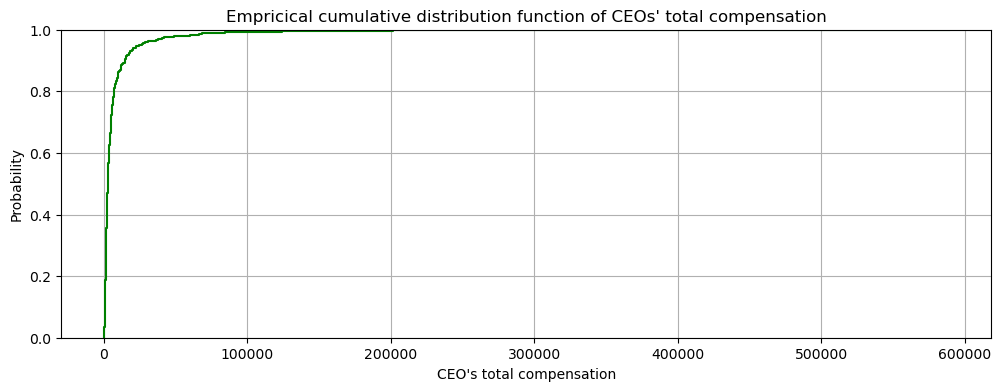

In [16]:
plt.figure(figsize=(12, 4));
sns.ecdfplot(totcomp, color='green');
plt.title('Empricical cumulative distribution function of CEOs\' total compensation');
plt.xlabel('CEO\'s total compensation');
plt.ylabel('Probability');
plt.rc('axes', axisbelow=True);
plt.grid();

So, here we can see that the function is increasing rapidly at the beginning of its range. It means that most of CEOs have total compensation in its lower range.

#### _i. $\hat{F}^{-1}(0.1)$ and $1 - \hat{F}^{-1}(0.9)$_

Let's find some values representing our dataset using ECDF.

So, let's calculate the value of $\hat{F}^{-1}(0.1)$. 

The inverse ECDF $\hat{F}^{-1}(x)$ is called the _quantile function_. It is such value of the total compensation that the probability, that compensation of randomly selected CEO from dataset is equal to or less than this value, is equal to $x$, $0.1$ in our case. 

It's exactly the value of 10%-lower quantile.

In [17]:
print(np.quantile(totcomp, 0.1))

1002.4


So, randomly selected CEO from the dataset with the probability 0.1 has total compensation value, equal to or less than 1002.40. In other words, 10% of CEOs have total compensation equal or less than 1002.40.

Similarly, let's find the value of $\hat{F}^{-1}(0.9)$, which is the value of 10%-upper quantile.

In [20]:
print(np.quantile(totcomp, 0.9))

15046.000000000005


According to this value, randomly selected CEO from the dataset with the probability 0.9 has total compensation, equal to or less than 15046.00. In other words, 90% of CEOs have total compensation equal or less than 15046.00.

#### _ii. $\hat{F}(2000)$ and $1 - \hat{F}(4000)$_

Let's find value of $\hat{F}(2000)$.

In [15]:
print(ecdf.cdf.evaluate(2000))

0.34451901565995524


From here, we can conclude that probability that randomly selected CEO has total compensation, equal to or less than 2000.00, is 0.34 or we can say that 34% of CEOs in the dataset have total compensation, equal to or less than 2000.00.

Let's calculate the probability that randomly selected CEO in the dataset has total compensation, greater than 4000.00. It's equal to the value of $1 - \hat{F}$(4000).

In [16]:
print(1 - ecdf.cdf.evaluate(4000))

0.3847874720357942


In other words, the 38.47% CEOs in the dataset have total compensation, greater than 4000.00.

### _(c) Plot the histogram of totcomp and the Box-plot (or violin-plot) using the default option in R/Python. What is the interpretation of the area of a rectangle in the histogram? Link the parts of the Box-Plot to the location measures above._

To better understand the data and its distribution inside the sample, let's visualise it using histogram.

The histogram of CEOs' total compensations values has the following form:

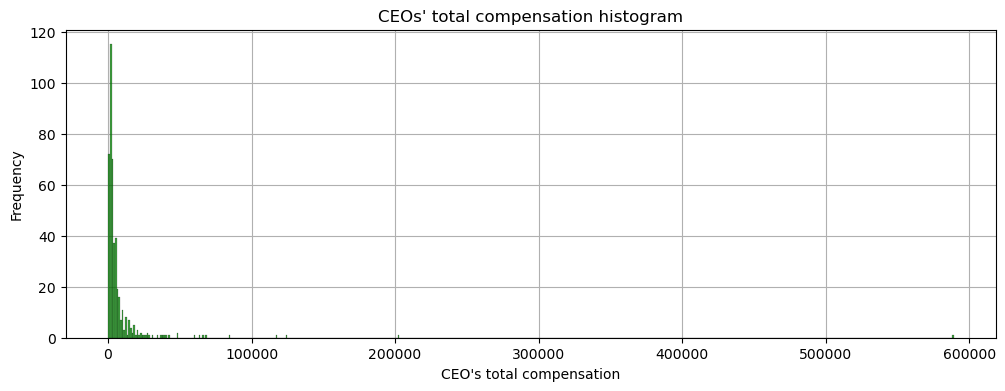

In [17]:
plt.figure(figsize=(12, 4));
sns.histplot(totcomp, color='green');
plt.title('CEOs\' total compensation histogram');
plt.xlabel('CEO\'s total compensation');
plt.ylabel('Frequency');
plt.rc('axes', axisbelow=True);
plt.grid();

Here we can see that its disrtibution is right-skewed. The height of each rectangle (let's say between $a$ and $b$ values, width of rectangle - $b - a$) here represents the frequency of CEOs, who have total compensation within its interval (between $a$ and $b$).

Now, let's look at another plot, which is called boxplot.

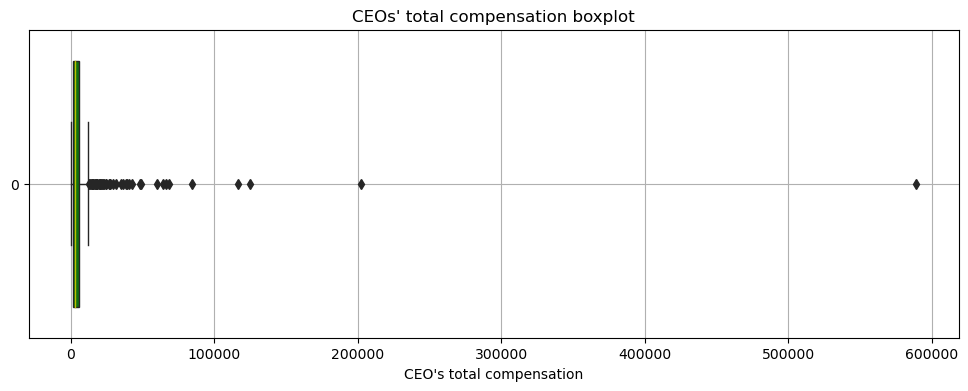

In [18]:
plt.figure(figsize=(12, 4));
sns.boxplot(totcomp, orient='h', color='green', linewidth=1, medianprops=dict(color="y"));
plt.title('CEOs\' total compensation boxplot');
plt.xlabel('CEO\'s total compensation');
plt.rc('axes', axisbelow=True);
plt.grid();

Due to big outliers this plot has low readability. Let's explore only the part, where we can link the location measures, that we've reviewed above.

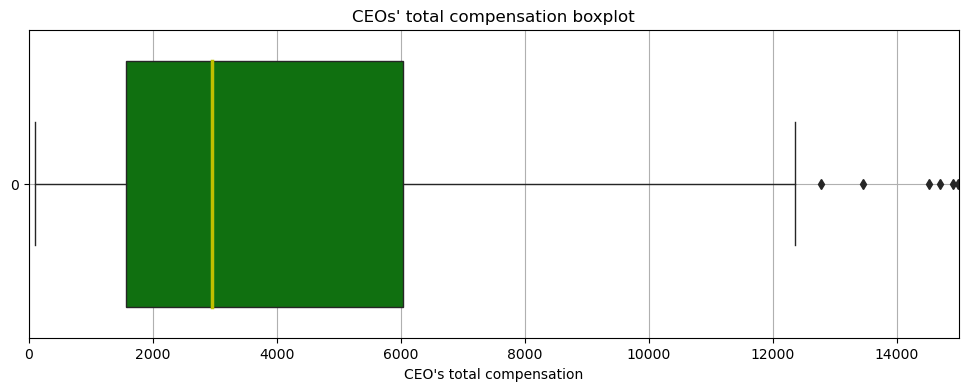

In [19]:
plt.figure(figsize=(12, 4));
sns.boxplot(totcomp, orient='h', color='green', linewidth=1, medianprops=dict(color="y", linewidth=2.5));
plt.xlim(0, 15000);
plt.title('CEOs\' total compensation boxplot');
plt.xlabel('CEO\'s total compensation');
plt.rc('axes', axisbelow=True);
plt.grid();

So, we can see on this plot the median ($Q_2$) (yellow line inside the rectangle), upper- ($Q_3$) and lower-quartiles ($Q_1$) (rectangle boundaries). The width of rectangle is called interquartile range, $IQR = Q_3 - Q_1$

Two vertical lines (called upper and lower whiskers) represents values of $Q_1 - 1.5 \times IQR$ and $Q_3 + 1.5 \times IQR$.

Values outside these values are considered outliers (diamonds on the plot).

Additionally, we can conclude the symmetry of the distribution by the median and whiskers placement. In our case, we make sure that distribution is right-skewed.

### _(d) What can be concluded about the distribution of the data? Are the location measures computed above still appropriate? Compute and discuss an appropriate measure of symmetry._

The distribution is right-skewed. As we can see from both plots big outliers are presented in the sample and due to the asymmetry of the distribution mean is confusable and not appropriate for getting significant measure. In case of right-skewness that we have, mean is higher, than median, shifted to the right. As we have several significant outliers, the trimmed mean is more representable here. To understand the distribution better quantiles (median, quartiles, etc) are more appropriate here.

We can measure the symmetry (skewness) of the distribution numerically. For this purpose, we need to calculate the sample skewness (empirical skewness) coefficient by the formula $\frac{1}{n} \sum_{i = 1}^{n} (\frac{x_i - \bar{x}}{\tilde{s}})^3$

In [20]:
stats.skew(totcomp)

14.796488300344116

As it is significantly larger than zero, it means that the distribution is strongly right-skewed, as we saw previously from the plots above.

### _(e) Check which method is used in your software to compute the optimal bandwidth (or the number of bars) in the histogram. Describe it shortly here. Make plots of too detailed and too rough histograms. What can we learn from these figures?_

Let's explore, how the histogram plot could be changed, and what influence that. 

Previously we get detailed histogram. Seaborn library computes the optimal bandwidth by default as the maximum of _Freedman Diaconis Estimator (FDE)_ and _R’s default method (or Sturges' method) (R)_.

FDE is resilient to outliers estimator that takes into account data variability and data size and it's calculated by the following formula:

$2 \frac{IQR}{\sqrt[3]{n}}$, where $IQR = Q_3 - Q_1$

Sturges' method takes only data size into account. Formula is the following:

$[\log_2n] + 1$

This method assumes approximately normal distribution, otherwise it performs poorly.

The number of bins is the value of data range divided by bandwidth.

So, let's explore, how bandwidth or bins count influence the readability and informativity of the histogram.

First let's set bins count to some huge value, for example, $2500$. 

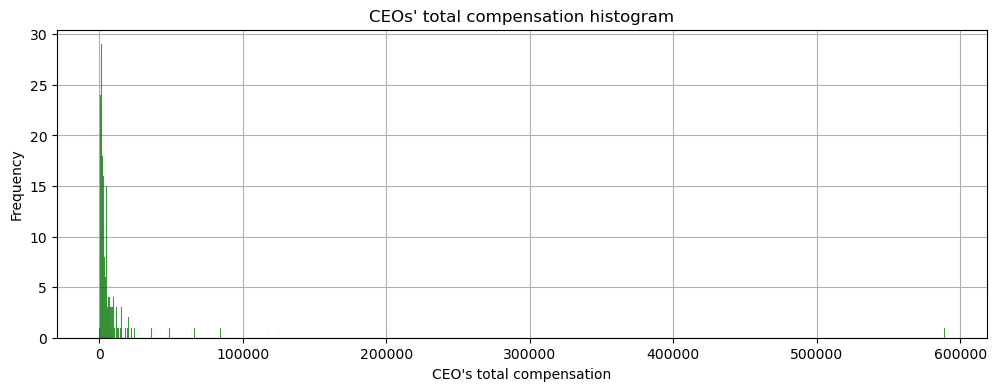

In [21]:
plt.figure(figsize=(12, 4));
sns.histplot(totcomp, color='green', bins=2500);
plt.title('CEOs\' total compensation histogram');
plt.xlabel('CEO\'s total compensation');
plt.ylabel('Frequency');
plt.rc('axes', axisbelow=True);
plt.grid();

We can draw a conclusion here that such bins count makes the histogram visually more complex and less readable and in some cases it could obscure the general patterns in the data. 

Now, draw the histogram with bins count $10$.

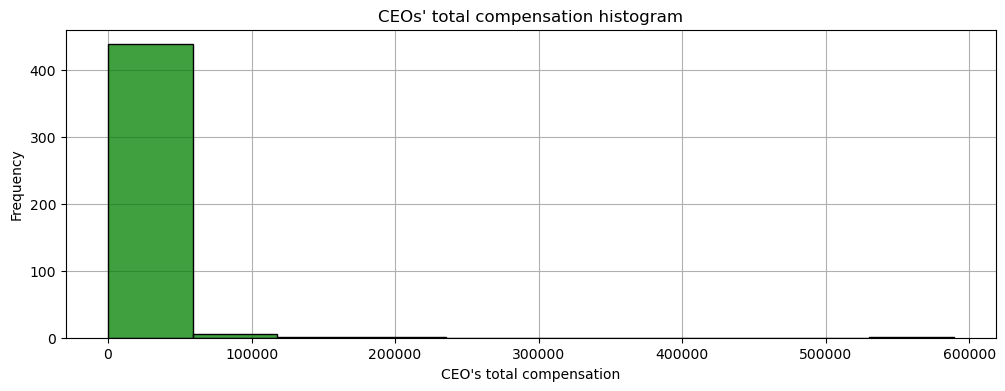

In [22]:
plt.figure(figsize=(12, 4));
sns.histplot(totcomp, color='green', bins=10);
plt.title('CEOs\' total compensation histogram');
plt.xlabel('CEO\'s total compensation');
plt.ylabel('Frequency');
plt.rc('axes', axisbelow=True);
plt.grid();

Here we can see that the histogram is also low informative, it misses important details and small variabilities.

So, bin width have a huge impact on the appearance and readability of the histogram. It could be either noisy and too detailed, or too rough with missed important details. Ploting it we should fulfill an appropriate bin width that strikes a balance between taking meaningful patterns in the data as well as providing a clear representation of the distribution. 

### _(f) There are methods which help us make the distribution of the sample more symmetric. Consider the natural logarithm of the total compensation: ln(totcomp). Plot the histogram (and Box-plot) and compare it with the figures for the original data. Compute the mean and the median. What can be concluded from the new values? Provide economic interpretation._

Considering of the natural logarythm of the data is a good method to make the distribution of the sample more symmetric. Let's make sure of it by comparing its histograms.

In [23]:
log_totcomp = np.log(totcomp);

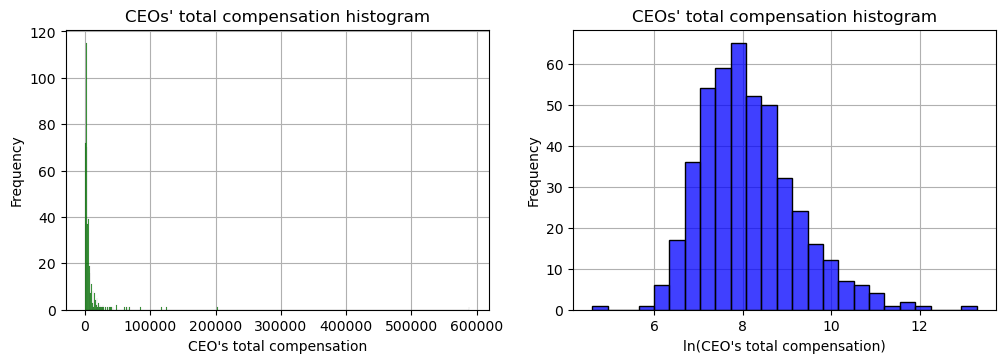

In [24]:
plt.figure(figsize=(12, 8));

plt.subplot(2, 2, 1);
sns.histplot(totcomp, color='green');
plt.title('CEOs\' total compensation histogram');
plt.xlabel('CEO\'s total compensation');
plt.ylabel('Frequency');
plt.rc('axes', axisbelow=True);
plt.grid();

plt.subplot(2, 2, 2);
sns.histplot(log_totcomp, color='blue');
plt.title('CEOs\' total compensation histogram');
plt.xlabel('ln(CEO\'s total compensation)');
plt.ylabel('Frequency');
plt.rc('axes', axisbelow=True);
plt.grid();

Obviously, that second histogram is more symmetric, than the left one. The range of values extremely decreased. Logarithm significally reduced the skewness.

Now, let's take a look on the quantiles changes using boxplot.

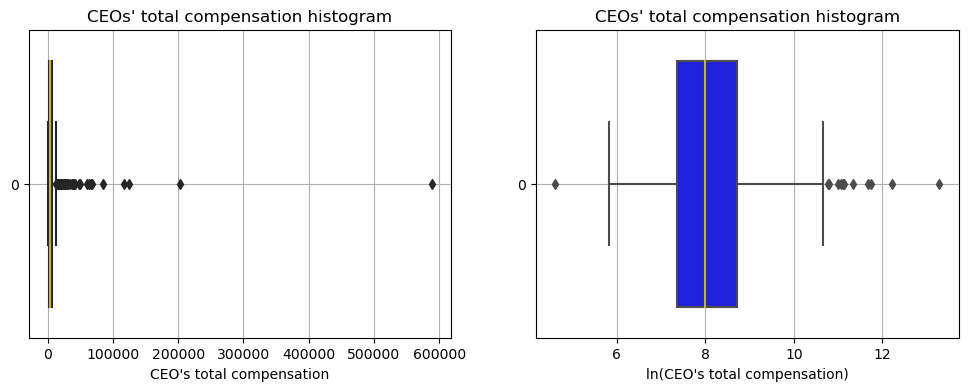

In [25]:
plt.figure(figsize=(12, 4));

plt.subplot(1, 2, 1);
sns.boxplot(totcomp, orient='h', color='green', medianprops=dict(color="y"));
plt.title('CEOs\' total compensation histogram');
plt.xlabel('CEO\'s total compensation');
plt.rc('axes', axisbelow=True);
plt.grid();

plt.subplot(1, 2, 2);
sns.boxplot(log_totcomp, orient='h', color='blue', medianprops=dict(color="y"));
plt.title('CEOs\' total compensation histogram');
plt.xlabel('ln(CEO\'s total compensation)');
plt.rc('axes', axisbelow=True);
plt.grid();

From here, we can confirm the symmetry of the distribution due to the box placement and  the median is almost in the center of rectangle. The number of outliers on the right boxplot is significally less than on the left one.

Now, let's find mean and median values numerically.

In [26]:
log_mean = np.mean(log_totcomp)
log_median = np.median(log_totcomp)
print("Mean:", log_mean);
print("Median:", log_median);
print("Difference (mean - median):", log_mean - log_median);

Mean: 8.135686093478537
Median: 7.989899374942939
Difference (mean - median): 0.14578671853559744


As we concluded above, such distribution is almost symmetric, the same inference we can do as the difference between mean and median is close to $0$.

So, when we need to get a more symmetric distribution, we can take logarithm value of it. It's very useful for reducing outliers' impact and for cases of usage of the methodologies with the assumption about the symmetry of the distribution.

## _2. Next we try to make a more detailed analysis of the data (without logarithm)._
### _(a) We suspect that the total compensation of the CEO and other variables are related to each other. Compute the correlation coefficients of Pearson and plot them as a heatmap (correlation map). Discuss the strength of the correlations._

To analyse the linear dependence between two features of the dataset we can calculate specific values, which are called correlation coefficient of Pearson.

Let's compute it and visualize using heatmap.

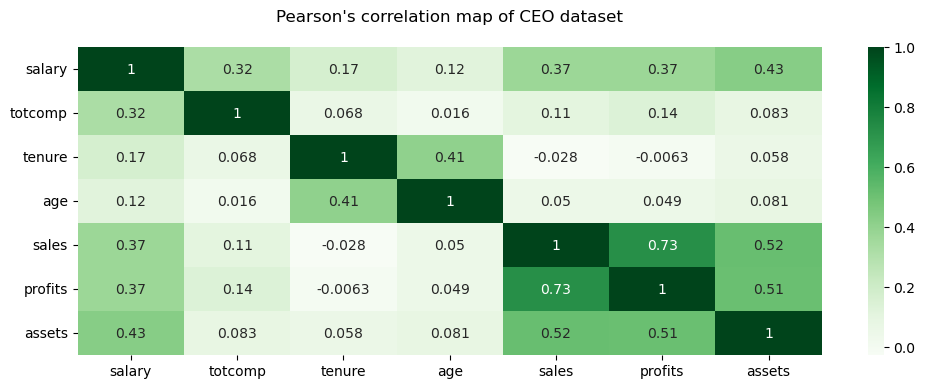

In [27]:
plt.figure(figsize=(12, 4));
sns.heatmap(data.corr(method = 'pearson'), annot=True, cmap="Greens");
plt.title("Pearson's correlation map of CEO dataset\n");
plt.show();

Using this correlation heatmap we can conclude information about the strength and direction of the linear relationship between the features, represented in the dataset.

Magnitude of the values tells about the strength of the relationship:

- values, close to 0, tell, that these features are linearly uncorrelated (for example, totcomp and age / profits and tenure / sales and tenure,  etc);

- the more values are close to 1 or -1, the stronger is the relationship (for example, sales and profits); 

The sign of the value tells about the direction of the relationship:

- positive values indicate that the more one feature is the more is the related one;

- negative values mean as one feature increases, another one - decreases.

Speaking about how the total compensation is linearly correlated with another features, we can conclude that it has the strongest linear positive relationship with salary, which is natural, as salary is a part of the CEOs' total compensation. It means the greater salary is, the greater total compensation is. The rest linear dependencies are positively weak or very weak, most of them are very close to zero, which means no linear relationship.

Regarding the rest of coefficients, conclusion is the most linearly correlated are sales and profits features. It has strong positive linear relationship. Also we can consider as related (not strong, let's say medium) sales with profits and assets with profits.

There is almost no linear relationship between totcomp and tenure, totcomp and age, totcomp and assets, tenure and sales, tenure and profits, tenure and assets, age and sales, age and profits, age and assets.

The rest of the linear relationships are weak or very weak.

### _(b) Plot the scatter plots (pairs in R). Conclude if the linear correlation coefficients are appropriate here. Compute now the Spearman’s correlations and make a heatmap. Compare the results with the results for Pearson._

To understand clearly how relationships between the features look like, let's visualize it using pair scatterplots.

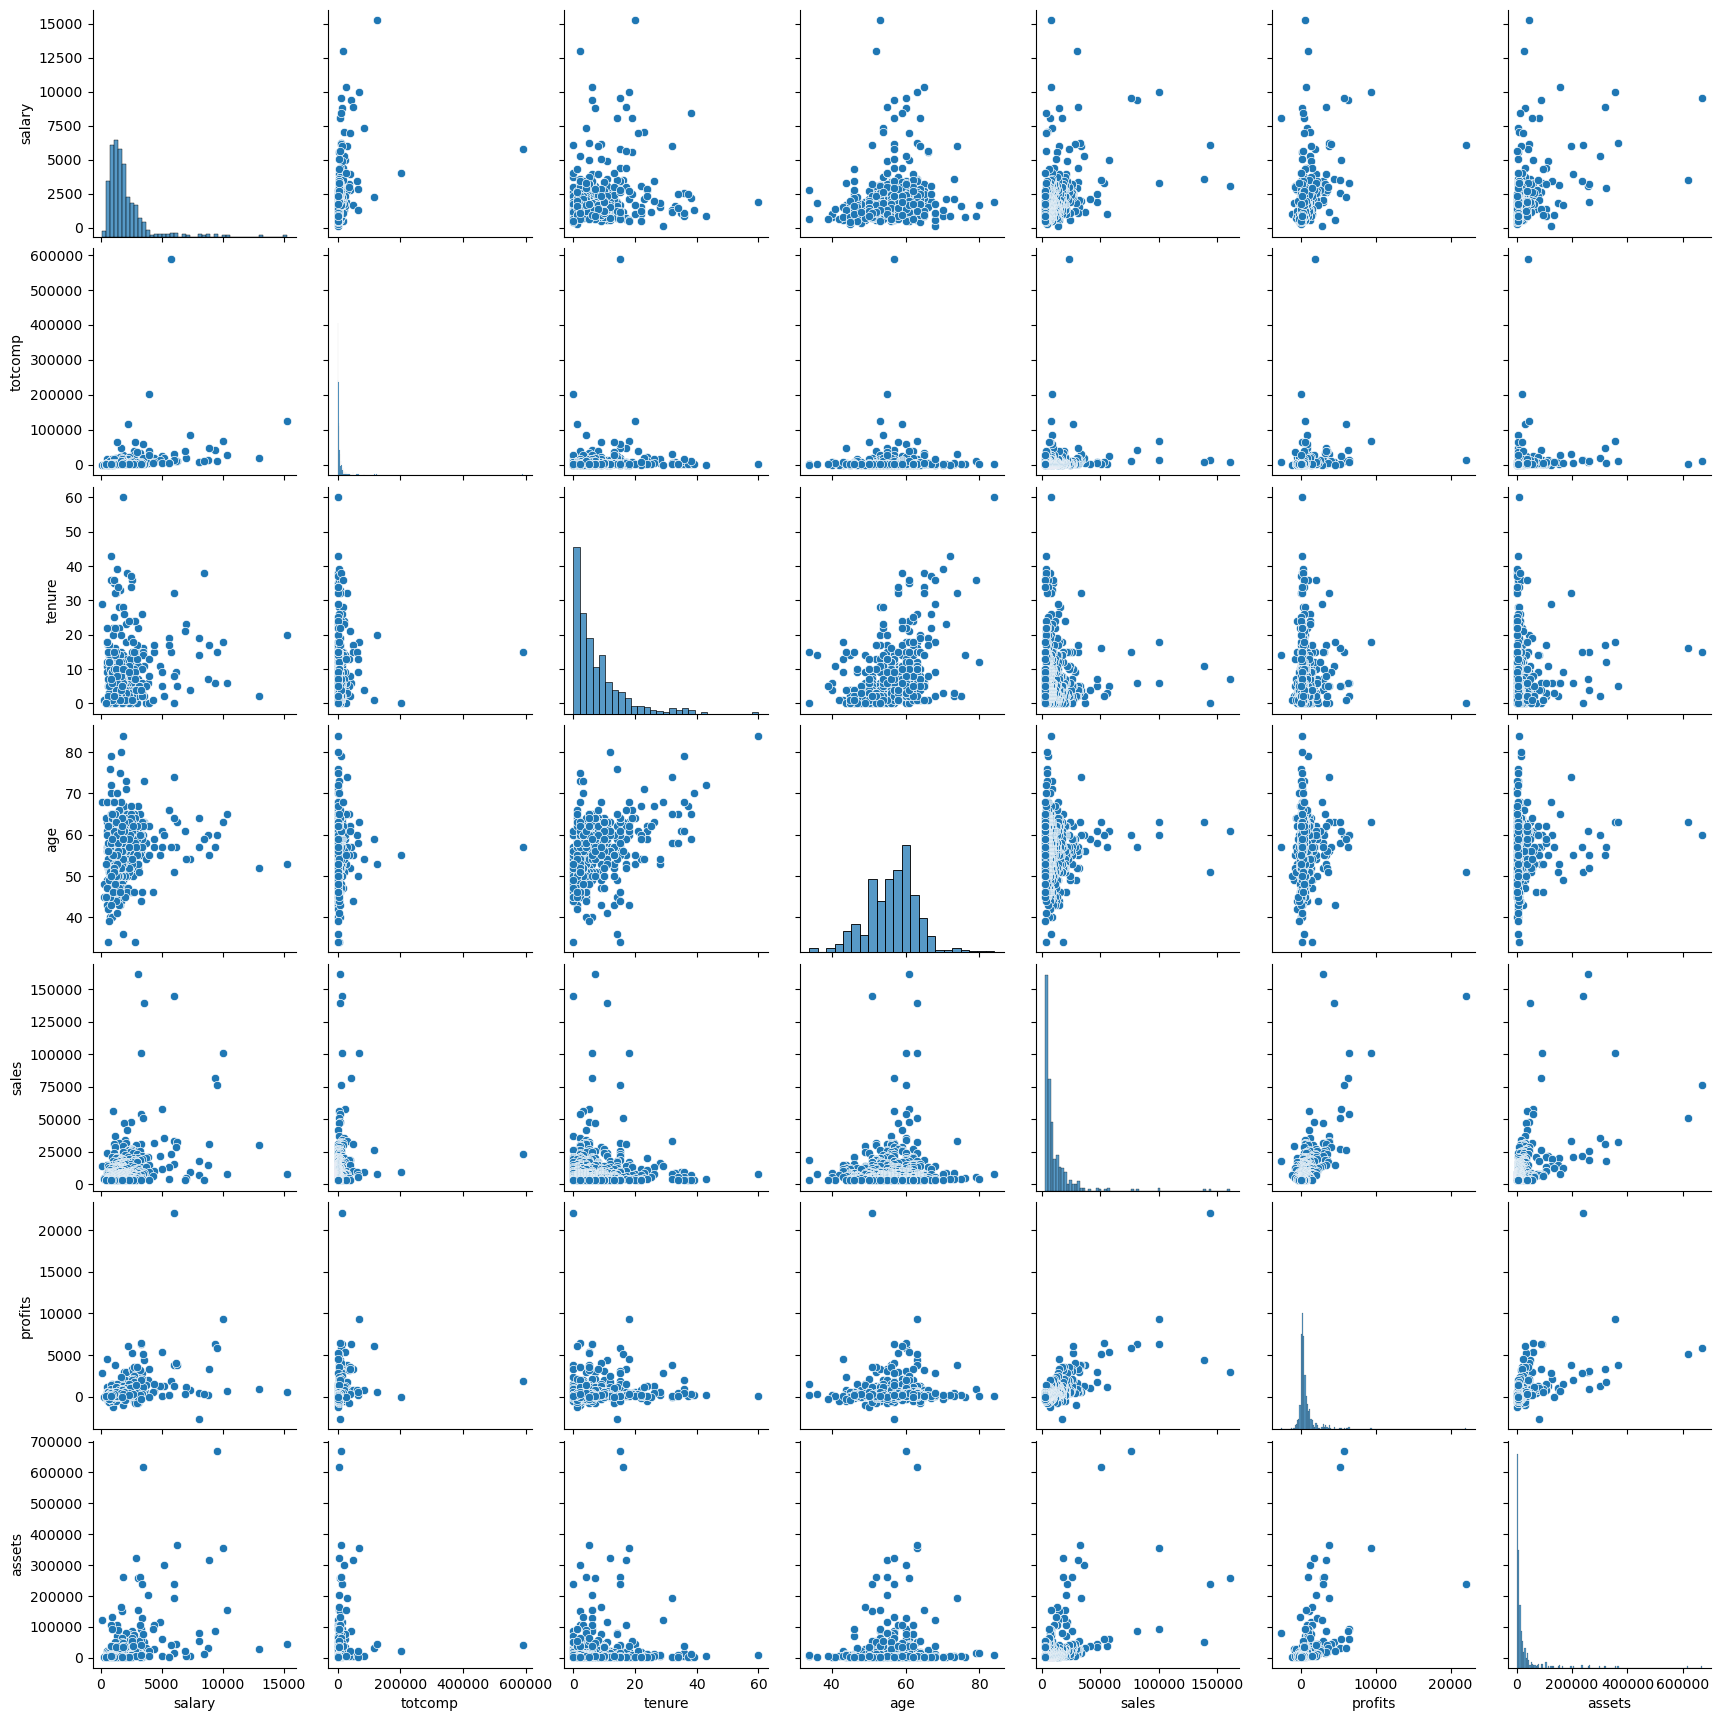

In [28]:
sns.pairplot(data);

Here we can notice that most of the relationships are not strictly linear. Moreover, some of them are concentrated in some range, for example, dependence between total compensation and sales, sales and profits, total compensation and assets. Relationships between total compensation and age, total compensation and tenure are also not strongly linearly correlated.

We can conclude that for some parts of features Pearson's coefficient is not appropriate to measure linear relationships.

Let's calculate one more coefficient (Spearman's), which is more stable to outliers and more appropriate for monotone type of relationships as it takes into account rank of obesrvations, not the values.

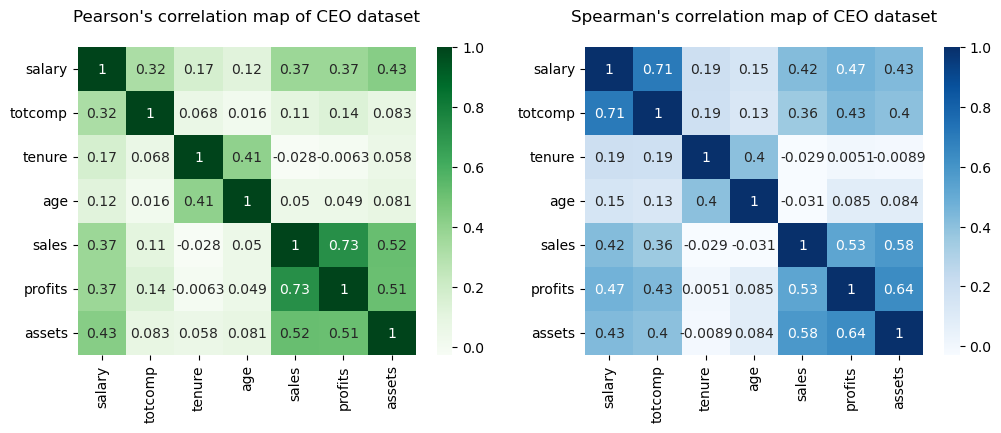

In [29]:
plt.figure(figsize=(12, 4));

plt.subplot(1, 2, 1);
sns.heatmap(data.corr(method = 'pearson'), annot=True, cmap="Greens");
plt.title("Pearson's correlation map of CEO dataset\n");

plt.subplot(1, 2, 2);
heatmap = sns.heatmap(data.corr(method = 'spearman'), annot=True, cmap="Blues");
heatmap.set(title="Spearman's correlation map of CEO dataset\n");

If we compare the values of coefficients we can see that most of the coefficients are a little bit greater or almost the same, but there are still some significant differences. Spearman's coefficient between totcomp and sales, totcomp and profits, totcomp and assets is close to $0.4$, and vice versa corresponding Pearson's coefficients are close ot $0$. It means that relationships between these features are more monotone than linear.

According to the Person's coefficient the strongest relationship is between profits and sales, but in the contrary according to the Spearman's coefficient the strongest correlation is between totcomp and salary.

### _(c) What is the rank of the observation totcomp= 6000? Explain in your own words the conceptual difference between the two correlation coefficient and link it to linear/monotone dependence._

At first, let's check if our dataset contains the observation with totcomp = 6000.

In [30]:
totcomp[totcomp == 6000]

Series([], Name: totcomp, dtype: int64)

So, as it is not present in the dataset, we need to calculate the rank value of the observation with totcomp = 6000 in case it is there.

In [31]:
totcomp_new =  pd.DataFrame(totcomp.copy())
totcomp_new.loc[len(totcomp_new)] = 6000
totcomp_new['totcomp rank'] = totcomp_new['totcomp'].rank()
totcomp_new[totcomp_new['totcomp'] == 6000]

,totcomp,totcomp rank
447,6000,335.0


So, when we add observation with totcomp = 6000 into our dataset, it will have rank of 335 in the ordered sample, so there are 334 observations with total compensation, less, than 6000 and the rest of the observation will be greater in such case.

The main difference between Pearson's and Spearman's coefficients is that Pearson's coefficient takes into account the values themselves and in the contrary Spearmans' coefficient is not calculating any values itself, but its ranks in the ordered sample. So, this coefficient considers only the ranks of the values, which represent only if the value is greater or lower, but doesn't consider how much greater or lower.

In conclusion, we can say that Pearson's coefficient is good for exploration of linear dependences, but is very sensitive to outliers as it is working with values. In the contrary, Spearman's coefficient is more stable to outliers and is good estimator of the monotone relationships.

### _(d) Consider the two subsamples: CEOs younger than 50 and older than 50. Plot for both subsamples overlapping histograms/ecdf’s and discuss the results. What can we learn from the corresponding location and dispersion (!) measures?_

Let's split the sample into two categories "CEOs younger than 50" and "CEOs older than 50".

In [32]:
younger_50 = data[data['age'] < 50]
older_50 = data[data['age'] >= 50]

So, let's plot overlapping histograms for these two subsamples and find some insights from there.

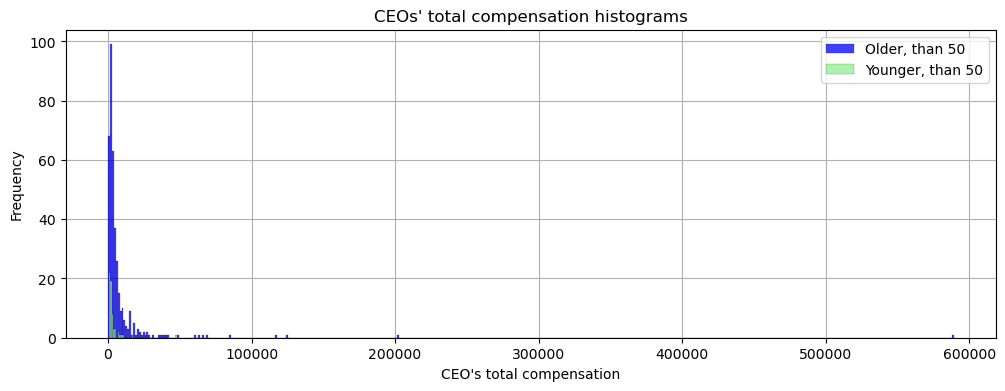

In [33]:
plt.figure(figsize=(12, 4));
sns.histplot(data=older_50, x="totcomp", color="blue", label="Older, than 50");
sns.histplot(data=younger_50, x="totcomp", color="lightgreen", label="Younger, than 50");
plt.title('CEOs\' total compensation histograms');
plt.xlabel('CEO\'s total compensation');
plt.ylabel('Frequency');

plt.legend();
plt.rc('axes', axisbelow=True);
plt.grid();

Here we can see that distributions of both groups are right-skewed with a large concentration at the beginning of sample ranges.

Speaking about the spread of the subsamples, as the blue tail is much wider, we can conclude that total compensations of CEOs older than 50 is significantly wider. It means that total compensation of CEOs older than 50 has more variability than younger ones.

Now, let's look at empirical cumulative distribution functions of these two subsamples.

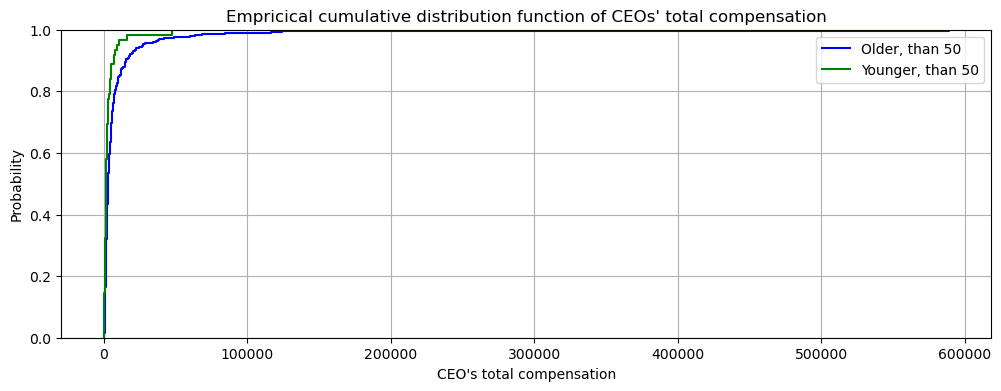

In [34]:
plt.figure(figsize=(12, 4))
sns.ecdfplot(older_50, x='totcomp', color='blue', label='Older, than 50');
sns.ecdfplot(younger_50, x='totcomp', color='green', label='Younger, than 50');
plt.title('Empricical cumulative distribution function of CEOs\' total compensation');
plt.xlabel('CEO\'s total compensation')
plt.ylabel('Probability')

plt.legend()
plt.rc('axes', axisbelow=True);
plt.grid();

Here, we can see that at the low values plots are increasing very rapidly, again it means that the number of observations is greater here than at the high values of total compensations, so values of CEOs' total compensations are concentrated at the low values.

The other thing, we can see at these plots, that the range and variability of total compensations of CEOs, older than 50 are wider than younger CEOs.

Let's calculate mean, median and variance for both groups:

In [35]:
older_mean = np.mean(older_50['totcomp'])
older_median = np.median(older_50['totcomp'])
older_variance = np.var(older_50['totcomp'])

younger_mean = np.mean(younger_50['totcomp'])
younger_median = np.median(younger_50['totcomp'])
younger_variance = np.var(younger_50['totcomp'])

print("Group of CEOs, older than 50:")
print(f"mean = {older_mean:.3f}\t\tmedian = {older_median:.3f}\tvariance = {older_variance:.3f}")
print("\nGroup of CEOs, younger than 50:")
print(f"mean = {younger_mean:.3f}\t\tmedian = {younger_median:.3f}\tvariance = {younger_variance:.3f}")

Group of CEOs, older than 50:
mean = 9125.961		median = 3161.000	variance = 1143732756.926

Group of CEOs, younger than 50:
mean = 3459.855		median = 1819.000	variance = 40512908.576


So, here we can conclude, that CEOs, older than 50, on average have greater total compensation, than younger CEOs, as both mean and median are significantly higher. It is natural as the older CEO is, the more experience he or she has.

Speaking about the variability in the total compensation, we can say that CEOs, older than 50, have bigger spread in total compensatiobs. The reason of it could be extreme outliers. We can assume that there are a lot of factors, that influence the total compensation of older CEOs.

## _3. Consider another grouping of the data. Define the groups:_

![caption](task_3.png)

Let's separate our dataset into groups by salaries (S1, S2, S3) and groups by age (A1, A2). For this purpose let's create two categorical variables "salary group" and "age group", which will distinguish to which group CEO belongs.

In [36]:
def set_salary_group(salary):
    if salary < 3000:
        return "S1"
    elif salary < 5000:
        return "S2"
    else:
        return "S3"

def set_age_group(age):
    if age < 50:
        return "A1"
    else:
        return "A2"

data['salary group'] = data['salary'].apply(set_salary_group)
data['age group'] = data['age'].apply(set_age_group)
data

,salary,totcomp,tenure,age,sales,profits,assets,salary group,age group
0,3030,8138,7,61,161315.0,2956.0,257389.0,S2,A2
1,6050,14530,0,51,144416.0,22071.0,237545.0,S3,A2
2,3571,7433,11,63,139208.0,4430.0,49271.0,S2,A2
3,3300,13464,6,60,100697.0,6370.0,92630.0,S2,A2
4,10000,68285,18,63,100469.0,9296.0,355935.0,S3,A2
...,...,...,...,...,...,...,...,...,...
442,1866,4311,10,59,2934.0,375.0,35800.2,S1,A2
443,906,2627,6,59,2932.8,193.9,4986.5,S1,A2
444,2300,2387,9,57,2910.0,182.9,2738.7,S1,A2
445,875,1151,7,50,2904.7,132.0,5008.7,S1,A2


### _(a) Aggregate the data to a 2×3 contigency table with absolute and with relative frequencies._

To analyse the dependence between two groups we need to build contingency table, which contain frequencies per each group.

In [37]:
crosstab = pd.crosstab(data['age group'], data['salary group'], margins=True) 
crosstab_frequencies = pd.crosstab(data['age group'], data['salary group'], margins=True, normalize=True) 

So, here we have contingency table with absolute frequencies.

In [38]:
crosstab

salary group,S1,S2,S3,All
age group,,,,
A1,59,3,0,62
A2,323,37,25,385
All,382,40,25,447


Now, let's build contingency table with relative frequencies.

In [39]:
crosstab_frequencies

salary group,S1,S2,S3,All
age group,,,,
A1,0.131991,0.006711,0.000000,0.138702
A2,0.722595,0.082774,0.055928,0.861298
All,0.854586,0.089485,0.055928,1.000000


### _(b) Give interpretation for the values of $n_{12}$, $h_{12}$, $n_{1*}$ and $h_{1*}$._

If we look at the contingency table with absolute frequencies and look at the value of the cell at the intersection of $A_1$ row and $S_2$ column it represents, how much CEOs belongs to age group A1 and salary group S2, so in our table we have that there are 3 CEOs in our dataset, who are under 50 years old and have salary between 3000.00 and 5000.00 at the same time. 

In the last row we can see the total numbers of CEOs per each salary group, accordingly, in the last column we have the numbers of CEOs per each age group.

Now, look at the contingency table with relative frequencies. For example, in the cell at the intersection of $A_1$ row and $S_2$ column we have the fraction of CEOs in the whole sample, who are under 50 years old and have salary between 3000.00 and 5000.00 at the same time. So, we have 0.006711 in our table. In other words, it's 0.006711 of probability that randomly selected CEO is under 50 years old and have salary between 3000.00 and 5000.00 at the same time or we can say that 0.67% of CEOs in our dataset belongs to this category.

Similarly to the first table, in the last row we can have the total fraction of CEOs in the sample per each salary group, accordingly, in the last column we have the fractions of CEOs in the sample per each age group.

### _(c) Compute an appropriate dependence measure for $S_i$ and $A_j$. What can be concluded from its value? What can we infer about the comovement of the variables or their changes in opposite directions?_

As $S_i$ and $A_j$ are categorical, to analyse dependence between them we need to use specific correlation coefficient, which is called "Corrected contingency coefficient of Pearson", which uses $\chi^2$-test inside.

Let's compute this coefficient.

In [40]:
crosstabWithoutMargins = pd.crosstab(data['age group'], data['salary group'], margins=False) 
print(stats.contingency.association(crosstabWithoutMargins, method='pearson'))

0.11675594902852329


As the general Pearson coefficient lies between $0$ and $1$, as it is close to 0, we can conclude that dependence between $S_i$ and $A_j$ is weak.

This coefficient doesn't provide measure to detect the direction of dependence. It only gives the measure of strength of the relationship.

# Problem 2: Descriptive Statistics and Probability Theory: Simulated Data

## _1. In practice the data is always very heterogenous. To reflect it we contaminate the data by adding an outlier or a subsample with different characteristics._

### _(a) Draw a sample of size $100$ from $N(10,1^2)$. To obtain a realistic heterogenous sample add to this data a new sample of size $m$ simulated from $N(20,2^2)$, i.e. $\mu_2 = 20$ and $\sigma_2 = 4$. The size $m$ will obviously influence the properties of the whole data set. Vary $m$ from $10$ to $200$ (say, by step $20$). (The resulting sample is said to stem from a mixture normal distribution and arises in practice if we put together observations from two homogenous cohorts). Calculate mean, median, and sample variance as a function of $m$. Discuss the impact of heterogeneity on the these measures._

Let's make a sample of normal distribution with $mean = 10$ and $variance = 1$ of 100 size.

In [41]:
norm_sample = np.random.normal(loc=10, scale=1, size=100); # loc - mean, scale - std

Now, we will create some samples of normal distribution, but with $mean = 20$ and $variance = 4$ of sizes $10, 30, 50, ..., 190$. Then we combine these samples with previous sample of $N(10, 1)$ distribution.

In [42]:
def simulate_sample(norm_sample, m):
    subsample = np.random.normal(loc=20, scale=2, size=m); # loc - mean, scale - std
    return subsample, np.concatenate((norm_sample, subsample));

simulated_samples = [simulate_sample(norm_sample, m) for m in range(10, 200, 20)];

So, let's compute mean, median and variance for each combined sample and analyse it.

In [43]:
def statistics(sample):
    return len(sample), np.mean(sample), np.median(sample), np.var(sample);

for sample in simulated_samples:
    print('n = %d; mean = %f; median = %f; variance = %f' % statistics(sample[:][1]));

n = 110; mean = 10.969413; median = 10.221867; variance = 9.345612
n = 130; mean = 12.299394; median = 10.509557; variance = 18.700124
n = 150; mean = 13.362251; median = 10.855834; variance = 24.455316
n = 170; mean = 14.195179; median = 11.216233; variance = 26.918099
n = 190; mean = 14.786923; median = 11.863894; variance = 27.110402
n = 210; mean = 15.256397; median = 16.673956; variance = 27.596040
n = 230; mean = 15.622428; median = 17.547317; variance = 26.200507
n = 250; mean = 15.768424; median = 17.717089; variance = 24.492691
n = 270; mean = 16.457081; median = 18.748113; variance = 27.001926
n = 290; mean = 16.555649; median = 18.493917; variance = 24.796674


We can see here that at the beginning mean is close to the mean of $N(10, 1)$ sample, but with increasing of subsample size mean is also increasing, it is getting closer to the mean of $N(20, 4)$ sample.

Similiraly to the mean, median is also increasing, as sample size increases. We can notice that mean increases smoothly. In the contrary, at the beginning, when size of $N(10, 1)$ sample is bigger, median is close to its mean (to 10), but when size of $N(20, 2)$ sample becomes greater than previous one, median is rapidly increasing and becomes close to the mean of the this sample (to 20).

Speaking about variance, the peak of its value is at the moment, when sizes of subsamples are equal. So, while the size of $N(20, 4)$ sample is less than the first one, distribution is more similar to the distribution of $N(10, 1)$ sample and when it becomes greater, the more it is, the more the distribution becomes similar to the distribution of $N(20, 4)$ sample.

### _(b) Plot Box-plots (or violin plots) and histograms for each subsample individually and for the sample for a few different values of $m$._

To better understand and see all these changes visually, let's plot box-plots and histograms per each subsample and combined one.

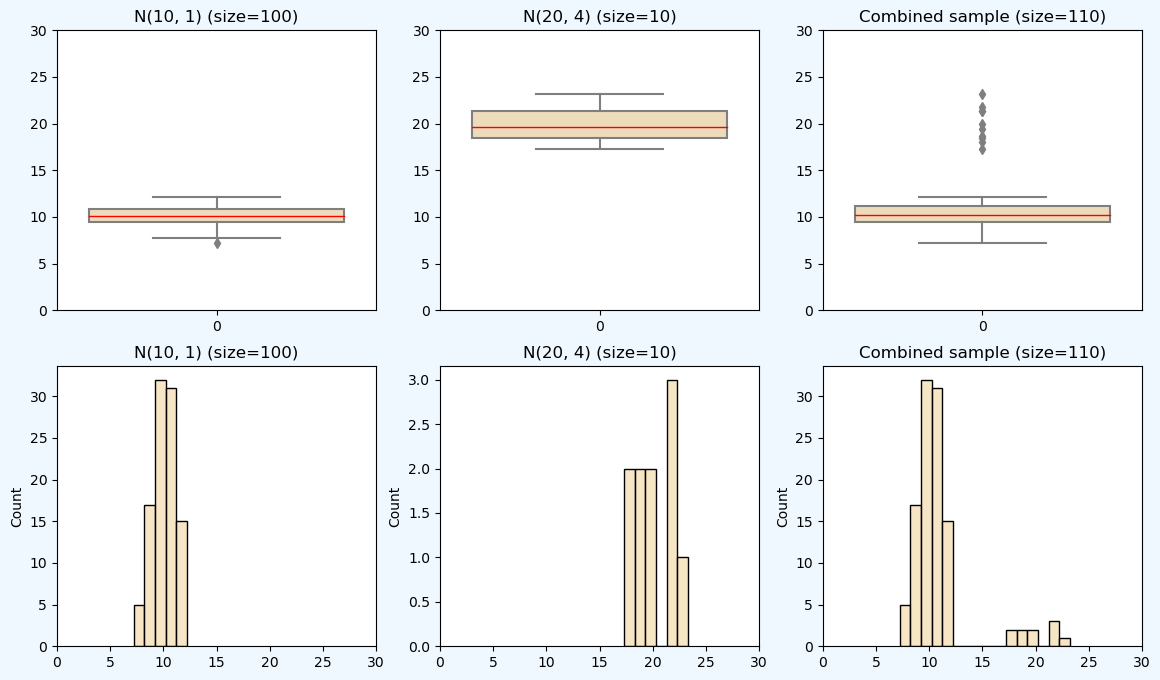

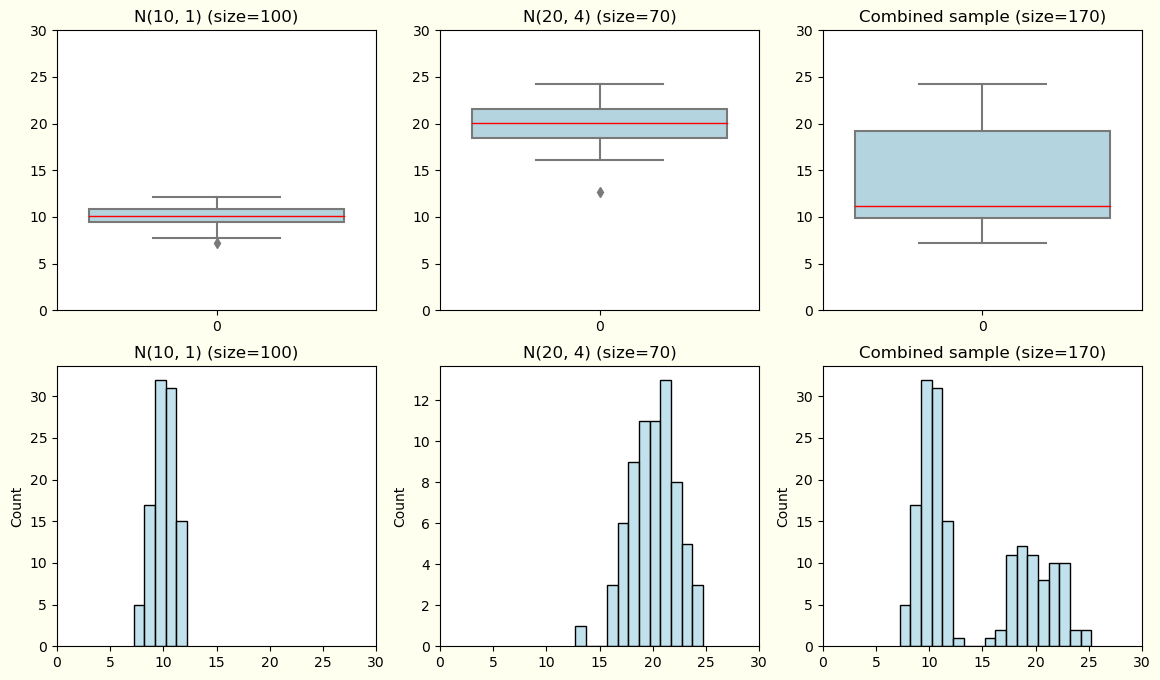

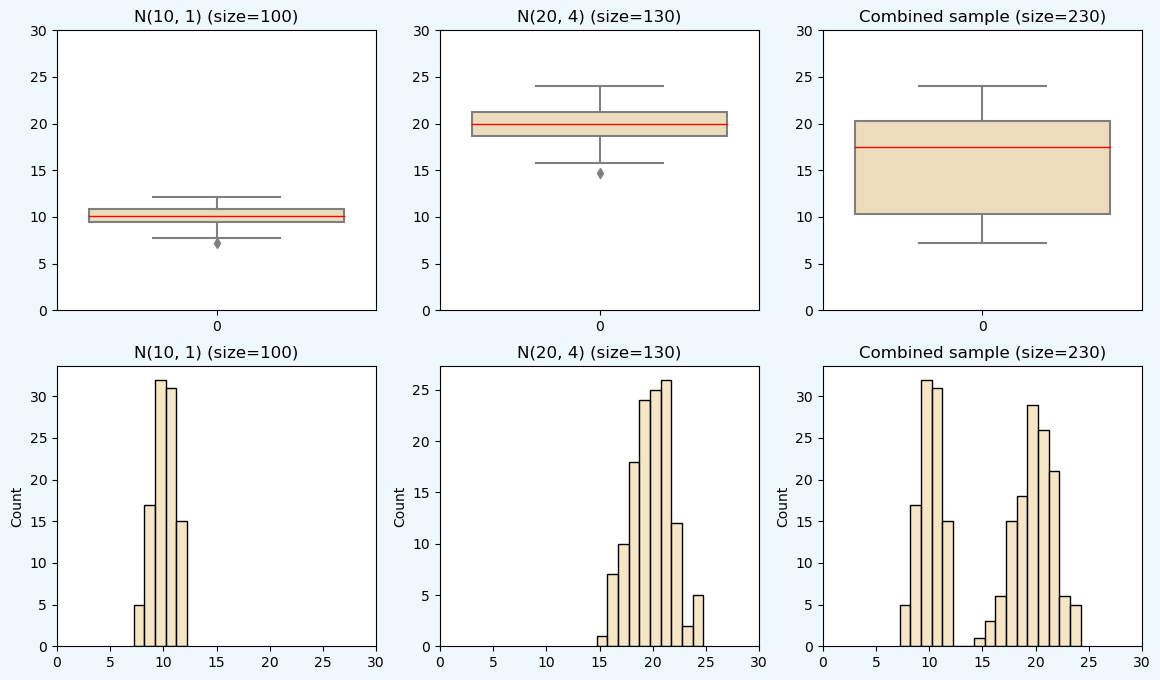

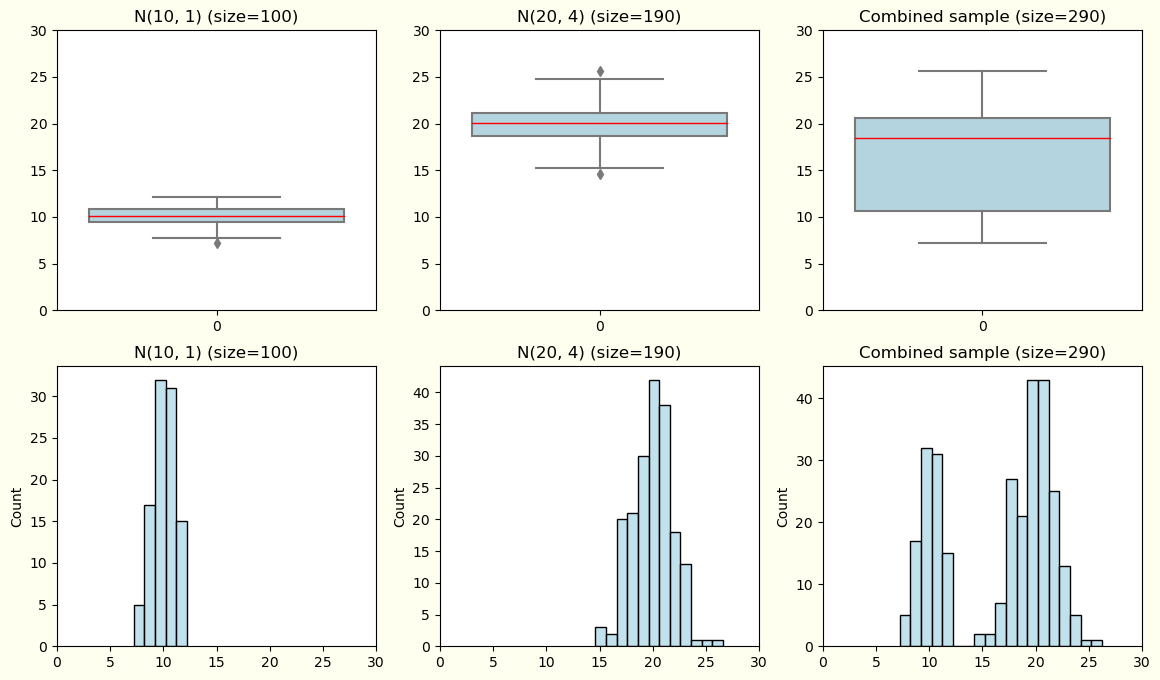

In [44]:
for i in range(0, len(simulated_samples), 3):
    samples = simulated_samples[i];
    plt.figure(figsize=(14, 8), facecolor='aliceblue' if i % 2 == 0 else 'ivory');
    
    plt.subplot(2, 3, 1);
    sns.boxplot(norm_sample, color='lightblue' if i % 2 != 0 else 'wheat', medianprops=dict(color="r", linewidth=1));
    plt.title('N(10, 1) (size=%d)' % len(norm_sample));
    plt.ylim(ymin=0, ymax = 30);
    
    plt.subplot(2, 3, 2);
    sns.boxplot(samples[0], color='lightblue' if i % 2 != 0 else 'wheat', medianprops=dict(color="r", linewidth=1));
    plt.title('N(20, 4) (size=%d)' % len(samples[0]));
    plt.ylim(ymin=0, ymax = 30);

    plt.subplot(2, 3, 3);
    sns.boxplot(samples[1], color='lightblue' if i % 2 != 0 else 'wheat', medianprops=dict(color="r", linewidth=1));
    plt.title('Combined sample (size=%d)' % len(samples[1]));
    plt.ylim(ymin=0, ymax = 30);
    
    plt.subplot(2, 3, 4);
    sns.histplot(norm_sample, binwidth=1, color='lightblue' if i % 2 != 0 else 'wheat');
    plt.title('N(10, 1) (size=%d)' % len(norm_sample));
    plt.xlim(xmin=0, xmax = 30);
    
    plt.subplot(2, 3, 5);
    sns.histplot(samples[0], binwidth=1, color='lightblue' if i % 2 != 0 else 'wheat');
    plt.title('N(20, 4) (size=%d)' % len(samples[0]));
    plt.xlim(xmin=0, xmax = 30);
    
    plt.subplot(2, 3, 6);
    sns.histplot(samples[1], binwidth=1, color='lightblue' if i % 2 != 0 else 'wheat');
    plt.title('Combined sample (size=%d)' % len(samples[1]));
    plt.xlim(xmin=0, xmax = 30);

As we told before, we have two subsamples with different means, therefore we have a "bimodal" distribution. The size of each subsample has a significant impact on the distribution shape and its measures, the more size of $N(20, 4)$ sample is, the more measures become closer to its measures. 

## _2. Next step is to simulate two dependent data sets. We simulate two samples with a given value of the correlation coefficient._

### _(a) Let $U \sim N(0, 1)$ and $V \sim N(0, 1)$. Let $U^* = U$ and $V^*=\rho U + \sqrt{1 - \rho^2}V$. Prove that $Corr(U^*, V^*) = \rho$ and the variances of both variables $U^*$ and $V^*$ equal one._

Let's remind some of expectation's and variance's properties, which will be useful:

(1) $\mathbb{E}(aX) = a\mathbb{E}(X)$

(2) $\mathbb{E}(X + Y) = \mathbb{E}(X) + \mathbb{E}(Y)$

(3) $Var(X) = \mathbb{E}(X^2) - (\mathbb{E}(X))^2$

(4) $Var(aX) = a^2Var(X)$

Assume $U$ and $V$ - independent random variables. Then we have two additional properties:

(5) $\mathbb{E}(XY) = \mathbb{E}(X)\times\mathbb{E}(X)$

(6) $Var(X + Y) = Var(X) + Var(Y)$


First of all, find expectation and variance values for $U^*$ and $V^*$:

As $U$ and $V$ are standard normal variables, then 

(7) $\mathbb{E}(U) = \mathbb{E}(V) = 0$

(8) $Var(U) = Var(V) = 1$

Therefore:

$\mathbb{E}(U^*) = \mathbb{E}(U) = 0$ (9)

$\mathbb{E}(V^*) = \mathbb{E}(\rho U + \sqrt{1 - \rho^2}V) = \vert prop. (2) \vert = \mathbb{E}(\rho U) + \mathbb{E}(\sqrt{1 - \rho^2}V) = \vert prop. (1) \vert = \rho\mathbb{E}(U) + \sqrt{1 - \rho^2}\mathbb{E}(V) = \vert (7) \vert = \rho\times0 + \sqrt{1 - \rho^2}\times0 = 0$ (10)

$Var(U^*) = Var(U) = \vert (8) \vert = 1$ (11)

$Var(V^*) = Var(\rho U + \sqrt{1 - \rho^2}V) = \vert prop. (6) \vert = Var(\rho U) + Var(\sqrt{1 - \rho^2}V) = \vert prop. (4) \vert = \rho^2Var(U) + (\sqrt{1 - \rho^2})^2Var(V) = \vert (8) \vert = \rho^2\times1 + (1 - \rho^2)\times1 = 1$ (12)

So, $Var(U^*) = Var(V^*) = 1$.

Now, let's find correlation between $U^*$ and $V^*$. It could be calculated by the formula:

$Corr(X, Y) = \frac{\mathbb{E}([X - \mathbb{E}(X)]\times[Y - \mathbb{E}(Y)])}{\sqrt{Var(X)Var(Y)}}$

So, $Corr(U^*, V^*) = \frac{\mathbb{E}([U^* - \mathbb{E}(U^*)]\times[V^* - \mathbb{E}(V^*)])}{\sqrt{Var(U^*)Var(V^*)}} = \vert (9), (10), (11), (12) \vert = \frac{\mathbb{E}([U^* - 0]\times[V^* - 0])}{\sqrt{1\times1}} = \mathbb{E}(U^*\times V^*) = \mathbb{E}(U\times(\rho U + \sqrt{1 - \rho^2}V)) = \mathbb{E}(\rho U^2 + \sqrt{1 - \rho^2}UV) = \vert prop. (2) \vert = \mathbb{E}(\rho U^2) + \mathbb{E}(\sqrt{1 - \rho^2}UV) = \vert prop. (1) \vert = \rho\mathbb{E}(U^2) + \sqrt{1 - \rho^2}\mathbb{E}(UV) = \vert (3) \implies \mathbb{E}(X^2) = Var(X) - (\mathbb{E}(X)^2) \vert = \rho(Var(U) - (\mathbb{E}(U))^2) + \sqrt{1 - \rho^2}\mathbb{E}(UV) = \vert (7), (8), prop. (5) \vert = \rho\times(1 - 0) + \sqrt{1 - \rho^2}\times0 = \rho$

Now, let's make sure of this numerically.

Let, for example, $\rho = 0.5$

In [45]:
rho = 0.5

Now, we generate two samples with $N(0,1)$ distribution and sample $size = 1000$.

In [46]:
sample_U = np.random.normal(loc=0, scale=1, size=1000) # loc - mean, scale - std
sample_V = np.random.normal(loc=0, scale=1, size=1000) # loc - mean, scale - std

Let's build a new sample $V^*$, dependent to sample $U$ ($U^*$)

In [47]:
def V_asterisk(rho, U, V):
    return rho * U + np.sqrt(1 - rho**2) * V

sample_U_asterisk = sample_U
sample_V_asterisk = V_asterisk(rho, sample_U, sample_V)

So, compute the variances of $U^*$ and $V^*$ samples:

In [48]:
print(np.var(sample_U_asterisk))

1.015635258369482


In [49]:
print(np.var(sample_V_asterisk))

1.044007566932578


So, we can see that variance are really close to 1.

Now, compute correlation between these variables.

In [50]:
print(np.corrcoef(sample_U_asterisk, sample_V_asterisk))

[[1.         0.54695085]
 [0.54695085 1.        ]]


Correlation between $U^*$ and $V^*$ is close to $0.5$, as it was expected, as we set $\rho=0.5$

### _(b) Use the above idea to simulate two samples of size $n = 100$ from a normal distribution with different values of $\rho$. Compute the correlation coefficients of Pearson and of Spearman. Compare the correlation to the original parameter $\rho$ (for example, plot Pearson vs. $\rho$ and Spearman vs. $\rho$)._

Let's generate samples $U^*$ and $V^*$ with size of $100$ and with $\rho$ in $[-1; 1]$ with step $0.1$. In parallel, let's compute Pearson's and Spearman's corellation coefficients of these samples. 

In [51]:
n = 100

samples_U = []
samples_V = []
rho_list = []
pearson_list = []
spearman_list = []
for rho in np.arange(-1, 1.1, 0.1):
    sample_U = np.random.normal(loc=0, scale=1, size=n) # loc - mean, scale - std
    sample_V = np.random.normal(loc=0, scale=1, size=n) # loc - mean, scale - std
    sample_V_asterisk = V_asterisk(rho, sample_U, sample_V)

    samples_U.append(sample_U)
    samples_V.append(sample_V_asterisk)
    
    rho_list.append(rho)
    pearson_list.append(stats.pearsonr(sample_U, sample_V_asterisk)[0])
    spearman_list.append(stats.spearmanr(sample_U, sample_V_asterisk)[0])

Look at the values of Pearson's and Spearman's coefficients according to the $\rho$ values.

In [52]:
for i in range(len(rho_list)):
    print(f"Rho = {rho_list[i]:.3f} \tPearson's coef. = {pearson_list[i]:.3f} \tSpearman's coef. = {spearman_list[i]:.3f}")

Rho = -1.000 	Pearson's coef. = -1.000 	Spearman's coef. = -1.000
Rho = -0.900 	Pearson's coef. = -0.903 	Spearman's coef. = -0.898
Rho = -0.800 	Pearson's coef. = -0.809 	Spearman's coef. = -0.805
Rho = -0.700 	Pearson's coef. = -0.625 	Spearman's coef. = -0.616
Rho = -0.600 	Pearson's coef. = -0.668 	Spearman's coef. = -0.652
Rho = -0.500 	Pearson's coef. = -0.480 	Spearman's coef. = -0.486
Rho = -0.400 	Pearson's coef. = -0.340 	Spearman's coef. = -0.313
Rho = -0.300 	Pearson's coef. = -0.288 	Spearman's coef. = -0.243
Rho = -0.200 	Pearson's coef. = -0.116 	Spearman's coef. = -0.163
Rho = -0.100 	Pearson's coef. = -0.042 	Spearman's coef. = -0.099
Rho = -0.000 	Pearson's coef. = -0.071 	Spearman's coef. = -0.050
Rho = 0.100 	Pearson's coef. = 0.161 	Spearman's coef. = 0.179
Rho = 0.200 	Pearson's coef. = 0.083 	Spearman's coef. = 0.054
Rho = 0.300 	Pearson's coef. = 0.368 	Spearman's coef. = 0.361
Rho = 0.400 	Pearson's coef. = 0.428 	Spearman's coef. = 0.414
Rho = 0.500 	Pearson's

Now, let's compare these coefficients with the original parameter $\rho$

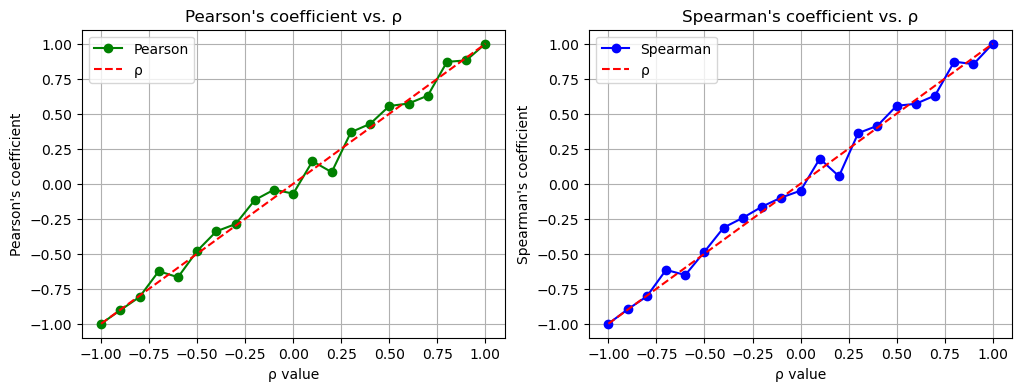

In [53]:
plt.figure(figsize=(12, 4));

plt.subplot(1, 2, 1);
plt.plot(rho_list, pearson_list, label='Pearson', marker='o', linestyle='-', color='g')
plt.plot(rho_list, rho_list, label="ρ", linestyle='--', color='r')
plt.xlabel('ρ value')
plt.ylabel('Pearson\'s coefficient')
plt.title('Pearson\'s coefficient vs. ρ')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2);
plt.plot(rho_list, spearman_list, label='Spearman', marker='o', linestyle='-', color='b')
plt.plot(rho_list, rho_list, label="ρ", linestyle='--', color='r')
plt.xlabel('ρ value')
plt.ylabel('Spearman\'s coefficient')
plt.title('Spearman\'s coefficient vs. ρ')
plt.legend()
plt.grid()

From these plots we can conclude that these two coefficients are good estimators of the original value of $\rho$ as both of them are close to the straight line, which represents $\rho$ value. I'd like to stress that both coefficients are too close (almost equal) to $\rho$ value for the lower and upper extreme values. The closer to 0 they are, the more difference between them and $\rho$ values is.

### _(c) Make a nonlinear but monotone transformation of $V_*$, say $exp$ for simplicity. Check the impact of this transformation on the correlation coefficients of Spearman and Pearson. Think about an appropriate visualization of the findings._

Let's try to transform data in $V^*$ sample using non linear, but monotone function $exp(x)$.

In [54]:
samples_V_exp = []
pearson_list_exp = []
spearman_list_exp = []
for i in range(len(samples_V)):
    sample_V_asterisk_exp = np.exp(samples_V[i])
    samples_V_exp.append(sample_V_asterisk_exp)
    
    pearson_list_exp.append(stats.pearsonr(samples_U[i], sample_V_asterisk_exp)[0])
    spearman_list_exp.append(stats.spearmanr(samples_U[i], sample_V_asterisk_exp)[0])

Now, let's take a look at the impact of such transformation on the coefficients' values. Let's draw overlapping plots for this purpose.

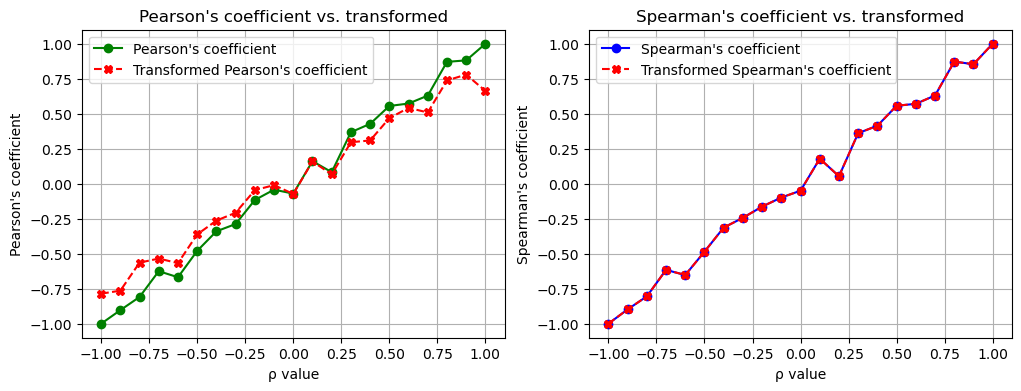

In [55]:
plt.figure(figsize=(12, 4));

plt.subplot(1, 2, 1);
plt.plot(rho_list, pearson_list, label='Pearson\'s coefficient', marker='o', linestyle='-', color='g')
plt.plot(rho_list, pearson_list_exp, label='Transformed Pearson\'s coefficient', marker='X', linestyle='--', color='r')
plt.xlabel('ρ value')
plt.ylabel('Pearson\'s coefficient')
plt.title('Pearson\'s coefficient vs. transformed')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2);
plt.plot(rho_list, spearman_list, label='Spearman\'s coefficient', marker='o', linestyle='-', color='b')
plt.plot(rho_list, spearman_list_exp, label='Transformed Spearman\'s coefficient', marker='X', linestyle='--', color='r')
plt.xlabel('ρ value')
plt.ylabel('Spearman\'s coefficient')
plt.title('Spearman\'s coefficient vs. transformed')
plt.legend()
plt.grid()

Here, we can see that Pearson's coefficient was changed. Transformed coefficient deviates more from $\rho$ value. It is expected behavior, as this coefficient computes the values of data, which were transformed, therefore coefficient is transformed as well. 

Speaking about Spearman's coefficient, we can see from the visualisation that transformed coefficient is completely the same as the original one. It is also expected behavior, as this coefficient doesn't compute values itself, but its rank. As the transformation is monotone, so the rank isn't changed as well as the coefficient is.

So, in conclusion, we can say that Pearson's coefficient is sensitive to monotone nonlinear transformations and in contrast Spearman's one is stable.

# Problem 3: Descriptive Statistics and Probability Theory: Probabilities and Distributions

## _1. All students belong to one of two groups: well prepared for the exam (group $A$) and not so well prepared for the exam (group $B$). $A$ “well prepared” student passes the exam with probability of $80\%$ and a “not so well prepared”-student with probability of $30\%$. We assume that only $10\%$ of all students belong to group $B$._

_$A$ : a randomly chosen student belongs to group $A$_

_$B$ : a randomly chosen student belongs to group $B$_

_$E$ : a randomly chosen student passes the exam_

### _(a) What is the probability that a randomly chosen student passes the exam AND belongs to group $A$._

Here we have two simultaneous events. To compute it we can use conditional probability formula:

$P(E \cap A) = P(E|A) \times P(A)$

$P(E|A)$ - probability that a student from the group A passes an exam

$P(A)$ - probability that a student belongs to the group A

$P(E \cap A) = P(E|A) \times P(A) = P(E|A) \times (1 - P(B)) = 0.8 \times (1 - 0.1) \times 100\% = 0.8 \times 0.9 \times 100\% = 72\%$

### _(b) What is the probability that a randomly chosen student passes the exam?_

Let's use the total probability formula, considering each possible variant, when student passes exam:

$P(E) = P(E|A) \times P(A) + P(E|B) \times P(B)$

$P(E|A)$ - probability that a student from the group A passes an exam

$P(E|B)$ - probability that a student from the group B passes an exam

$P(A)$ - probability that a student belongs to the group A

$P(B)$ - probability that a student belongs to the group B

$P(E) = P(E|A) \times P(A) + P(E|B) \times P(B) = P(E|A) \times P(A) + P(E|B) \times P(B) = (0.8 \times 0.9 + 0.3 \times 0.1) \times 100\% = (0.72 + 0.03) \times 100\% = 75\%$

### _(c) What is the probability that a student who passed the exam, belongs to group $B$?_

Obviously that here we have conditional probability, moreover, it's aposterior probability. It can be calculated by the Bayes' formula:

$P(B|E) = \frac{P(E|B) \times P(B)}{P(E)}$

$P(B|E)$ - probability that a student, who passed an exam, belongs to the group B

$P(B)$ - probability that a student belongs to the group B

$P(E)$ - probability that a student passes an exam

$P(B|E) = \frac{P(E|B) \times P(B)}{P(E)} = \frac{0.3 \times 0.1}{0.75} \times 100\% = 4\%$

## _2. The dean and the head of the program invite all students to a barbecue party at the end of the year. Five vegetarians are among the guests. The pitmaster is an expert in juicy steaks and still needs some practice with grilled vegetables. For this reason a portion of vegetables is burned to ashes with probability of $60\%$._

### _(a) What is the probability that non of the five vegetable servings is charred?_

The probability of charred vegetable servings is described by binomial distribution. So, let $X$ - amount of charred vegetable servings, $X \sim B(n; p)$, where $p = 0.6$ and $n = 5$.

Let's define the main values that we will need in this task:

$p = 0.6$ - probability that portion of vegetables is burned

$1 - p = 0.4$ - probability that portion of vegetables is NOT burned

$n = 5$ - number of trials (number of vegetarians)

$i$ - number of burned portions of vegetables

This probability could be calculated by the probability function of $X$:

$f(i) = P(X = i) = \binom{n}{i} \times p^{i} \times (1 - p)^{n - i} = \frac{n!}{i!(n - i)!} \times p^{i} \times (1 - p)^{n - i}$

Let's calculate it numerically $f(0) = P(X = 0)$ =

In [56]:
print(stats.binom.pmf(0, 5, 0.6))

0.010239999999999996


### _(b) What is the probability that exactly two of the five vegetable servings are charred?_
This probability is calculating by the same formula with $i = 2$:

So, $f(2) = P(X = 2) =$

In [57]:
print(stats.binom.pmf(2, 5, 0.6))

0.23040000000000008


### _(c) What is the probability that at least three out of five serving are charred?_
We can formulate this probability mathematically as following $P(X \geq 3)$.

It equals to $1 - P(X \leq 2)$ as it is discrete variable.

For calculating such probability we can use discrete distribution function $1 - F(2)$.

It can be calculated by the formula:

$1 - P(X \leq 2) = 1 - \sum_{i=0}^{2} f(i) = 1 - \sum_{i=0}^{2} \frac{n!}{i!(n - i)!} \times p^{i} \times (1 - p)^{n - i}$

In [58]:
print(1 - stats.binom.cdf(2, 5, 0.6))

0.68256


## _3. Let $X$ be the weekly return of stock $A$. We assume that it follows a normal distribution with $\mu = 0.03 (3\%)$ and $\sigma^2 = 0.02$. We invest $40\%$ of our capital in $10$ such stocks and the remaining $60\%$ in a risk-free asset with return $r_f = 0.01$._

Let's formulate it mathematically. We have $X_i \sim N(0.03, 0.02), i = \overline{1, n}$

In [59]:
mu = 0.03
sigma = math.sqrt(0.02)

### _(a) Calculate the probability that the return of a single stock is_
Let's remind some properties of the disrtibution function that will be useful further in this task:

(1) $P(X \leq b) = F(b)$

(2) $P(a < X) = 1 - P(X \leq a) = 1 - F(a)$

(3) $P(a < X \leq b) = F(b) - F(a)$

(4) $P(X = c) = 0$ for continuous distributions _(normal distribution is continuous one)_

To calculate the following probability we can use distribution function of the standard normal distribution. But as we have non standard distribution, we should find $Z$-scores at first, which we can calculate by the following formula:

$Z = \frac{X - \mu}{\sigma}$

### i. is larger then 0.01
$P(X > 0.01) = \vert prop. (2) \vert = 1 - P(X \leq 0.01) = 1 - F(0.01) = 1 - \Phi(Z_{0.01})$

Let's find the value of $Z_{0.01}$:

In [60]:
z_score = (0.01 - mu) / sigma
print(z_score)

-0.14142135623730948


Let's calculate the probability:

In [61]:
print(1 - stats.norm.cdf(z_score))

0.5562314580091424


### ii. is larger or equal 0.01
$P(X \geq 0.01) = \vert prop. (2) \vert = 1 - P(X < 0.01) = 1 - (P(X \leq 0.01) - P(X = 0.01)) = \vert prop. (4) \vert = 1 - (P(X \leq 0.01) - 0) = 1 - P(X \leq 0.01) = \vert prop. (1) \vert = 1 - F(0.01) = 1 - \Phi(Z_{0.01})$

So, this probability is equal to the previous one (0.5562314580091424)

### iii. is less then 0.01
$P(X < 0.01) = P(X \leq 0.01) - P(X = 0.01) = \vert prop. (1), (4) \vert = F(0.01) - 0 = F(0.01) = \Phi(Z_{0.01})$

Let's find the value of $Z_{0.01}$:

In [62]:
z_score = (0.01 - mu) / sigma
print(z_score)

-0.14142135623730948


Let's calculate the probability:

In [63]:
print(stats.norm.cdf(z_score))

0.4437685419908576


### iv. lies between 0.01 and 0.03
$P(0.01 < X < 0.03) = P(0.01 < X \leq 0.03) - P(X = 0.03) = \vert prop. (3), (4) \vert = F(0.03) - F(0.01) = \Phi(Z_{0.03}) - \Phi(Z_{0.01})$

Let's find the value of $Z_{0.01}$:

In [64]:
z_score_1 = (0.01 - mu) / sigma
print(z_score_1)

-0.14142135623730948


Let's find the value of $Z_{0.03}$:

In [65]:
z_score_2 = (0.03 - mu) / sigma
print(z_score_2)

0.0


Let's calculate the probability:

In [66]:
print(stats.norm.cdf(z_score_2) - stats.norm.cdf(z_score_1))

0.05623145800914242


### _(b) Determine the distribution of the portfolio return by stating the distribution and computing its parameters. (Use here the properties of the normal distribution, e.g. linear transformation)._

Let $I$ - portfolio return. Then $I = 0.4 \times (X_1 + X_2 + ... + X_{10}) + 0.6 \times 0.01 = 0.4 \times (X_1 + X_2 + ... + X_{10}) + 0.006$, where $X_i$ are independent

Speaking about the distribution of $I$ we can say that $I$ is a sum of linearly transformed normally distributed random variables. We know that linearly transformed normally distributed random variable is also normally distributed. Given this fact and central limit theorem (CLT) we can conclude that the sum of linearly transformed normally distributed random variables is also normally distributed.

Therefore, $I$ is normally distributed. To specify it, we need to compute its expectation and variance.

Before calculating expectation and variance, let's remind some properties, which will be useful:

(1) $\mathbb{E}(aX + b) = a \times \mathbb{E}(X) + b$

(2) $Var(aX + b) = a^2 \times Var(X)$

As $X_i$ are equally distributed, let's mark $X_i = X$.

Now calculate expectation of such distribution:

$\mathbb{E}(I) = \mathbb{E}(0.4 \times (X_1 + X_2 + ... + X_{10}) + 0.006) = \mathbb{E}(0.4 \times (X + X + ... + X) + 0.006) = \mathbb{E}(0.4 \times 10 \times X + 0.006) = \mathbb{E}(4 \times X + 0.006) = \vert prop. (1) \vert = 4 \times \mathbb{E}(X) + 0.006 = 4 \times 0.03 + 0.006 = 0.126$

Now compute the variance of $I$:

$Var(I) = Var(0.4 \times (X_1 + X_2 + ... + X_{10}) + 0.006) = Var(0.4 \times (X + X + ... + X) + 0.006) = Var (0.4 \times 10 \times X + 0.006) = Var(4 \times X + 0.006) = \vert prop. (2) \vert = 16 \times Var(X) + 0 = 16 \times 0.02 = 0.32$

So, we can conclude that $I \sim N(0.126, 0.32)$

### _(c) How a correlation among the assets can influence the variance of the investment? Which formula supports your idea?_
Let's mark portfolio, which consists of $n$ arbitrary assets, as $A$, $A = \sum_{i=1}^n w_i \times A_i$.

As $A_i$ are arbitrary, then the variance of $A$ could be calculated by the formula:

$Var(A) = Var(\sum_{i=1}^n w_i \times A_i) = \sum_{i=1}^n w_i^2 \times Var(A_i) + \sum_{i \neq j} w_i \times w_j \times Cov(A_i, A_j)$

From the formula of correlation coefficient we have:

$r_{A_iA_j} = \frac{Cov(A_i, A_j)}{\sqrt{Var(A_i) \times Var(A_j)}}$

Then:

$Var(A) = \sum_{i=1}^n w_i^2 \times Var(A_i) + \sum_{i \neq j} w_i \times w_j \times r_{A_iA_j} \times \sqrt{Var(A_i) \times Var(A_j)}$

So, we can conclude, if $r_{A_iA_j} = 0$, then it doesn't influence the variance, but if $r_{A_iA_j} \neq 0$, then it can either increase or decrease the variance of the investment.

## _4. Download (for example, from Yahoo Finance) the weekly prices and calculate the returns of Tesla Inc for the last two years (use simple returns $\frac{P_t − P_{t−1}}{P_{t−1}}$ or continuous returns $ln(\frac{P_t}{P_{t−1}})$ . Multiply the returns by $51$ to obtain annualized returns. You are interested in the probability that the Tesla return falls a) below $-2\%$; b) below $-4\%$._

At first, find the dataset on Yahoo Finance and download it.

In [67]:
tesla_data = pd.read_csv('TSLA.csv')
tesla_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-10-04,261.820007,268.333344,260.303345,261.829987,261.829987,107803200
1,2021-10-11,262.549988,281.070007,261.833344,281.010010,281.010010,244536600
2,2021-10-18,283.929993,303.333344,283.823334,303.226654,303.226654,329948100
3,2021-10-25,316.843323,371.736664,314.733337,371.333344,371.333344,662775600
4,2021-11-01,381.666656,414.496674,372.886658,407.363342,407.363342,541323600
...,...,...,...,...,...,...,...
101,2023-09-11,264.269989,278.980011,260.609985,274.390015,274.390015,663474100
102,2023-09-18,271.160004,273.929993,244.479996,244.880005,244.880005,574817000
103,2023-09-25,243.380005,254.770004,234.580002,250.220001,250.220001,588632500
104,2023-10-02,244.809998,263.600006,242.619995,260.529999,260.529999,592623500


### _(a) Calculate this probability using the tools and methods of the descriptive statistics (quantiles, empirical CDF, etc.)._

Let's calculate annualized simple returns:

In [68]:
price = tesla_data['Close']
annual_returns = np.array([((price[i] - price[i - 1]) / price[i - 1]) * 51 for i in range(1, len(price))])

Now let's calculate the probability that Tesla return fall below -2% using empirical CDF:

In [69]:
price_ecdf = stats.ecdf(annual_returns);

In [70]:
print(price_ecdf.cdf.evaluate(-0.02))

0.47619047619047616


Do the same to find the probability that Tesla return fall below -4%:

In [71]:
print(price_ecdf.cdf.evaluate(-0.04))

0.47619047619047616


Here we can see that the probability is the same - if the annualized return fell below -2%, it also fell below -4%.

### _(b) Calculate this probability assuming that the returns follow a normal distribution with the parameters given by the sample mean and sample variance._

At first, find sample mean and variance:

In [72]:
mean = np.mean(annual_returns)
var = np.var(annual_returns)
print(f'mean is: {mean}')
print(f'variance is: {var}')

mean is: 0.19509283538194463
variance is: 20.513827413845572


If we assume that the returns follow a normal distribution, then to use its standard distribution function for calculating probabilities, we need to find $Z$-scores $Z_{-0.02}$ and $Z_{-0.04}$:

In [73]:
z_score_1 = (-0.02 - mean) / math.sqrt(var)
z_score_2 = (-0.04 - mean) / math.sqrt(var)
print("Z_(-0.02) =", z_score_1, "\nZ_(-0.04) =", z_score_2)

Z_(-0.02) = -0.04749004660984192 
Z_(-0.04) = -0.051905818667103885


Now let's calculate the probability that Tesla return fall below 2%:

In [74]:
print(stats.norm.cdf(z_score_1))

0.4810613315206497


And compute the probability that Tesla return fall below 4%:

In [75]:
print(stats.norm.cdf(z_score_2))

0.4793018689510046


### _(c) Compare the probabilities. Discuss pros and cons of both methods._

So, first of all I'd like to point that both methods provided close to each other values. Values, provided by the second method are a little bit higher, but it's not significant.

The method of descriptive statistics, which I used (ecdf method) doesn't require any assumption for type of the distribution, at the same time it is not accurate for samples with small size, the more data we have the more accurate the result is.

Using normal distribution properties we need to be sure of the distribution type of the sample. By the way, this approach do many statistical tools available for us, which could be used for making some predictions.

Moreover, using ecdf method we have discrete distribution and that's why it's possible to have the same probability, if values, that we are analysing, are between two existing "neighbor" values in the sample. In the contrary, assuming normal distribution, as it's continious one, we have different probabilities for nearby values.

## _5. Assume that the price of a given asset can either decrease of increase in every period of time. This setting is called a binomial model. The probability of an upward movement equals $55\%$ and the starting price $S(0) = 10$. The upward and downward returns equal $0.02$ and $-0.01$ respectively. Consider holding the asset for several periods._

The probability that stock price increases is described by binomial distribution. So, let $X$ - amount of cases, when stock price was increased, $X \sim B(n; p)$, where $p = 0.55$ and $n$ - amount of observed periods.

Let's define the main values that we will need in this task:

$p = 0.55$ - probability that asset increase

$1 - p = 0.45$ - probability that asset decrease

$n$ - number of observed periods

$i$ - number of upward movement within $n$ periods

This probability could be calculated by the probability function of $X$:

$f(i) = P(X = i) = \binom{n}{i} \times p^{i} \times (1 - p)^{n - i} = \frac{n!}{i!(n - i)!} \times p^{i} \times (1 - p)^{n - i}$

### _(a) Calculate the probability that the stock price increases._

### _i ... five periods in a row_
so, we're observing five periods, and let's calculate the probability that stock price increases 5 periods in a row ($n = 5, i = 5$) is:

In [76]:
print(stats.binom.pmf(5, 5, 0.55))

0.05032843750000002


In [77]:
0.55 ** 5

0.05032843750000002

### _ii ... three periods in a row_
the probability that stock price increases 3 periods in a row ($n = 3, i = 3$) is:

In [78]:
print(stats.binom.pmf(3, 3, 0.55))

0.16637500000000005


### _iii ... in three out of five periods_
the probability that stock price increases 3 out of 5 periods in a row ($n = 5, i = 3$) is:

In [79]:
print(stats.binom.pmf(3, 5, 0.55))

0.336909375


### _iv ... in 10 out of 15 periods_
the probability that stock price increases 10 out of 15 periods in a row ($n = 15, i = 10$) is:

In [80]:
print(stats.binom.pmf(10, 15, 0.55))

0.14036046425626045


### _(b) Calculate the expected return of this investment after two periods._

Let's draw the graph, which demonstrates all possible cases during two periods.
So, we start from $S(0)$ point of time with $10$ price. After 1st period we have two possible outcomes - $S(1)=10\times(1+0.02)=10.2$ (with probability = $0.55$) and $S(1)=10\times(1 - 0.01)=9.9$ (with probability = $0.45$). Then after 2nd period we have four possible outcomes - $S(2)=10.2\times(1+0.02)=10.404$ (with probability $0.55$), $S(2)=10.2\times(1-0.01)=10.098$ (with probability $0.45$), $S(2)=9.9\times(1+0.02)=10.098$ (with probability $0.55$), $S(2)=9.9\times(1-0.01)=9.801$ (with probability $0.45$), 

![caption](graph_prob.png)

So, according to this graph after 2 periods we can get $10.404$ price with probability $P(S(2)=10.404 \vert S(1)=10.2) = 0.55 \times 0.55 = 0.3025$

Similarly we can get $9.801$ price with probability $P(S(2)=9.801 \vert S(1)=9.9) = 0.45 \times 0.45 = 0.2025$

As we can get $10.01$ price in two cases, then probability is equal a sum of probabilities of such cases:

$P(S(2)=10.098 \vert S(1)=10.2) + P(S(2)=10.098 \vert S(1)=9.9) = 0.55 \times 0.45 + 0.45 \times 0.55 = 0.495$

Having formula $\mathbb{E}(X) = \sum_{i} (x_i \times P(X = x_i))$ let's calculate expected price of an asset after two periods:

In [81]:
expected_price = 10.404 * 0.3025 + 9.801 * 0.2025 + 10.098 * 0.495
print(expected_price)

10.130422500000002


Therefore, expected return of such investment after two periodds could be calculated by the formula $\frac{\mathbb{E}(X) - S(0)}{S(0)}$:

In [82]:
(expected_price - 10) / 10

0.013042250000000167

So, the expected return of the investment after two periods is $0.013$ or $1.3\%$ 

## _6. Compute the following probabilities for the distributions $N(0,1)$, $t_2$, $Exp(1)$, $χ^2_4$:_

Let's remind some properties of the disrtibution function that will be useful in this task:

(1) $P(X \leq b) = F(b)$

(2) $P(a < X) = 1 - P(X \leq a) = 1 - F(a)$

(3) $P(a < X \leq b) = F(b) - F(a)$

(4) $P(X = c) = 0$ for continuous distributions

It's worth mentioning that all the distributions, we are working with in this task, are continious.

### _(a) $P(1 < X < 1.5)$_
$P(1 < X < 1.5) = P(1 < X \leq 1.5) - P(X = 1.5) = \vert prop. (3), (4)\vert = F(1.5) - F(1) - 0 = F(1.5) - F(1)$

In [83]:
norm = stats.norm.cdf(1.5) - stats.norm.cdf(1)
student = stats.t.cdf(1.5, 2) - stats.t.cdf(1, 2)
exp = stats.expon.cdf(1.5, scale=1) - stats.expon.cdf(1, scale=1) # scale = 1/lambda
chi2 = stats.chi2.cdf(1.5, 4) - stats.chi2.cdf(1, 4)
print('P(1 < X < 1.5) for:')
print('Standard normal distr. is:', norm)
print('Student\'s t-distr. is:', student)
print('Exponential distr. is:', exp)
print('Chi-squared distr. is:', chi2)

P(1 < X < 1.5) for:
Standard normal distr. is: 0.09184805266259899
Student's t-distr. is: 0.07512830295968675
Exponential distr. is: 0.14474928102301254
Chi-squared distr. is: 0.0831545222721744


### _(b) $P(1 \leq X < 1.5)$_
As we're working only with continuous distributions, this probability is the same as the previous one for each distribution.

Let's check it analytically, using its properties:

$P(1 \leq X < 1.5) = P(1 < X \leq 1.5) + P(X = 1) - P(X = 1.5) = \vert prop. (3), (4)\vert = F(1.5) - F(1) + 0 - 0 = F(1.5) - F(1)$ 

### _(c) $P(1 < X)$_
$P(1 < X) = \vert prop. (2) \vert = 1 - P(X \leq 1) = 1 - F(1)$

In [84]:
norm = 1 - stats.norm.cdf(1)
student = 1 - stats.t.cdf(1, 2)
exp = 1 - stats.expon.cdf(1, scale=1) # scale = 1/lambda
chi2 = 1 - stats.chi2.cdf(1, 4)
print('P(1 < X) for:')
print('Standard normal distr. is:', norm)
print('Student\'s t-distr. is:', student)
print('Exponential distr. is:', exp)
print('Chi-squared distr. is:', chi2)

P(1 < X) for:
Standard normal distr. is: 0.15865525393145707
Student's t-distr. is: 0.21132486540518713
Exponential distr. is: 0.36787944117144233
Chi-squared distr. is: 0.9097959895689501


### _(d) $P(X < 1)$_
$P(X < 1.5) = P(X \leq 1.5) - P(X = 1.5) = \vert prop. (1), (4)\vert = F(1.5) - 0 = F(1.5)$

In [85]:
norm = stats.norm.cdf(1.5)
student = stats.t.cdf(1.5, 2)
exp = stats.expon.cdf(1.5, scale=1) # scale = 1/lambda
chi2 = stats.chi2.cdf(1.5, 4)
print('P(X < 1.5) for:')
print('Standard normal distr. is:', norm)
print('Student\'s t-distr. is:', student)
print('Exponential distr. is:', exp)
print('Chi-squared distr. is:', chi2)

P(X < 1.5) for:
Standard normal distr. is: 0.9331927987311419
Student's t-distr. is: 0.8638034375544996
Exponential distr. is: 0.7768698398515702
Chi-squared distr. is: 0.17335853270322427


### _(e) $P(X = 1.5)$_
Again, due to we have only continuous distributions, according to the properties, mentioned above, we have:

$P(X = 1.5) = \vert prop. (4)\vert = 0$